# Example for the usage of the DiffusionAnalysis class

## 1. Imports and defining helper functions
Import the DiffusionAnalysis class and define a helper function

In [1]:
import json

from MembraneAnalysisToolbox.DiffusionAnalysis import DiffusionAnalysis

def analyse_resname(DA, selector: str, short: str):
    print(f"\n{short} analysis")

    DA.calc_passagetimes(selector)
    print(f"\t{short}-passages: " + str(len(DA.passageTimes[selector])))

    DA.save_passage_times_in_ns_to_txt(selector, short + "_passagetimes_in_ns.txt")

    DA.calc_diffusion(selector)
    print(f"\t{short}-Diffusioncoefficient: " + str(DA.D[selector]).replace(".", ","))

    fig_diff = DA.plot_diffusion(selector)
    DA.save_fig_to_results(fig=fig_diff, name="diffusion_" + short)

/bigpool/users/st166545/TransitionAnalysisProject/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Create the class object
Define the path where the traj.xtc and the topol.tpr file and the results folder are located.
Then create the class obect.
- The filepaths and the result paths are constructed
- analysis_max_step_size_ps=200 means that if the step size of the traj.xtc file is smaller than that, only every nth frame is stored and analysed to math the 200ps step for efficiency.
- verbose is set to false in this notebook
- L = 180 tells the class that the membrane thickness is 180 Angstroms

In [2]:
path = "/bigpool/users/ac130484/project/finished_sim/hex/hexane_dodecane/hex_18_3_2_n/"
print("Path: " + path)

DA = DiffusionAnalysis(
    topology_file=path + "topol.tpr",
    trajectory_file=path + "traj.xtc",
    results_dir=path + "analysis/",
    analysis_max_step_size_ps=200,
    verbose=False,
    L=180,
)

print(DA)

Path: /bigpool/users/ac130484/project/finished_sim/hex/hexane_dodecane/hex_18_3_2_n/
DiffusionAnalysis object:
  L: 180
  z_lower: None
  D: {}
  passageTimes: {}
  passageStarts: {}
  n_passages: {}
  results_dir: /bigpool/users/ac130484/project/finished_sim/hex/hexane_dodecane/hex_18_3_2_n/analysis/
  topology_file: /bigpool/users/ac130484/project/finished_sim/hex/hexane_dodecane/hex_18_3_2_n/topol.tpr
  trajectory_file: /bigpool/users/ac130484/project/finished_sim/hex/hexane_dodecane/hex_18_3_2_n/traj.xtc
  verbose: False
  analysis_max_step_size_ps: 200
  actual analysed step_size: 500.0
  nth_frame: 1
  n_frames analysed: 2001
  u: <Universe with 36930 atoms>
  trajectories: dict_keys([])



## 3. Run the analysis
This is done by calling the class-methods in the following order

	z_lower: 233.23501586914062


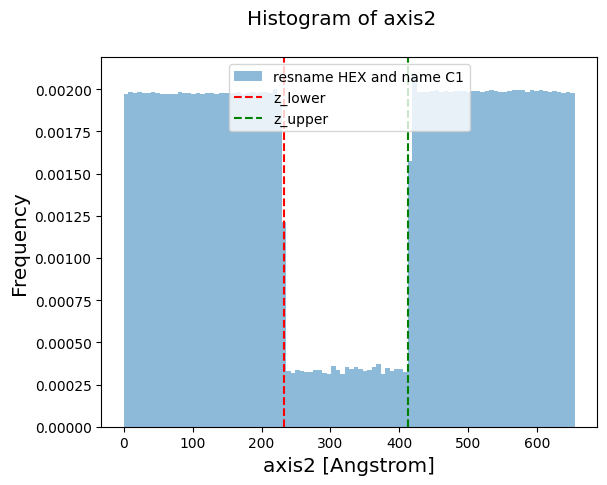

In [3]:

DA.find_membrane_location_hexstructure(mem_selector="resname C")
print("\tz_lower: " + str(DA.z_lower))

DA.verify_membrane_location(mem_selector="resname HEX and name C1")


hex analysis
	hex-passages: 1253
	hex-Diffusioncoefficient: 84,4054721659581


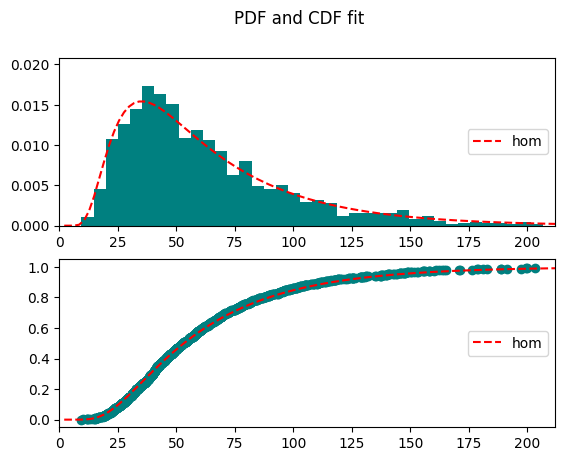

In [4]:
analyse_resname(DA, "resname HEX and name C1", "hex")


dod analysis
	dod-passages: 413
	dod-Diffusioncoefficient: 36,30698984816837


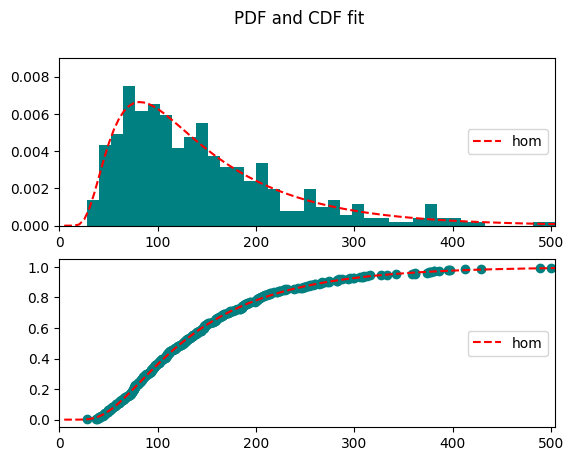

In [5]:
analyse_resname(DA, "resname DOD and name C2", "dod")

In [6]:
DA.store_results_json()

print("\n\n\n RESULTS:")
print(json.dumps(DA.D, indent=4))




 RESULTS:
{
    "resname HEX and name C1": 84.4054721659581,
    "resname DOD and name C2": 36.30698984816837
}
